In [1]:
import os
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score, roc_curve, log_loss,RocCurveDisplay,confusion_matrix, accuracy_score,classification_report,ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import shuffle
from sklearn.linear_model import LogisticRegression
from PIL import Image, ImageEnhance
import random

In [2]:
root_directory = "Project_Imgs"

file_data = []

for folder_name, subfolders, filenames in os.walk(root_directory):
    for filename in filenames:
        file_path = root_directory +"/" +os.path.join(folder_name, filename)
        relative_path = os.path.relpath(file_path, root_directory)
        folder = os.path.basename(folder_name)
        print(folder)
        # Add to the list
        file_data.append({"Photo_Path": relative_path, "Dogs_Type": folder})


df = pd.DataFrame(file_data)
csv_output_path = "output.csv"
df.to_csv(csv_output_path,mode='w', index=False, encoding='utf-8') 

print(f"CSV file with relative paths created successfully at {csv_output_path}")


borzoi
borzoi
borzoi
borzoi
borzoi
borzoi
borzoi
borzoi
borzoi
borzoi
borzoi
borzoi
borzoi
borzoi
borzoi
borzoi
borzoi
borzoi
borzoi
borzoi
borzoi
borzoi
borzoi
borzoi
borzoi
borzoi
borzoi
borzoi
borzoi
borzoi
borzoi
borzoi
borzoi
borzoi
borzoi
borzoi
borzoi
borzoi
borzoi
borzoi
borzoi
borzoi
borzoi
borzoi
borzoi
borzoi
borzoi
borzoi
borzoi
borzoi
borzoi
borzoi
borzoi
borzoi
borzoi
borzoi
borzoi
borzoi
borzoi
borzoi
borzoi
borzoi
borzoi
borzoi
borzoi
borzoi
borzoi
borzoi
borzoi
borzoi
borzoi
borzoi
borzoi
borzoi
borzoi
borzoi
borzoi
borzoi
borzoi
borzoi
borzoi
borzoi
borzoi
borzoi
borzoi
borzoi
borzoi
borzoi
borzoi
borzoi
borzoi
borzoi
borzoi
borzoi
borzoi
borzoi
borzoi
borzoi
borzoi
borzoi
borzoi
borzoi
borzoi
borzoi
borzoi
borzoi
borzoi
borzoi
borzoi
borzoi
borzoi
borzoi
borzoi
borzoi
borzoi
borzoi
borzoi
borzoi
borzoi
borzoi
borzoi
borzoi
borzoi
borzoi
borzoi
borzoi
borzoi
borzoi
borzoi
borzoi
borzoi
borzoi
borzoi
borzoi
borzoi
borzoi
borzoi
borzoi
borzoi
borzoi
borzoi
borzoi
borzoi

In [3]:
data = pd.read_csv("output.csv")
data.head()

,Photo_Path,Dogs_Type
0,Project_Imgs\borzoi\n02090622_10281.jpg,borzoi
1,Project_Imgs\borzoi\n02090622_10302.jpg,borzoi
2,Project_Imgs\borzoi\n02090622_10343.jpg,borzoi
3,Project_Imgs\borzoi\n02090622_10355.jpg,borzoi
4,Project_Imgs\borzoi\n02090622_1047.jpg,borzoi


In [4]:
# def preprocess_image(image_path, target_size=(350, 350)):
#     # Open the image
#     img = Image.open(image_path)
#     # Resize the image
#     img = img.resize(target_size)
#     # Convert to grayscale
#     img = img.convert('L')
#     # Normalize pixel values to [0, 1]
#     img_array = np.array(img) / 255
#     return img_array

# def augment_image(image_path, target_size=(350,350)):
#     # Open the image
#     img = Image.open(image_path)
    
#     # Resize the image
#     img = img.resize(target_size)
#     # Random horizontal flip
#     if random.random() > 0.5:
#         img = img.transpose(Image.FLIP_LEFT_RIGHT)
#     # Random rotation
#     angle = random.randint(-30, 30)
#     img = img.rotate(angle)
#     # Random brightness adjustment
#     enhancer = ImageEnhance.Brightness(img)
#     img = enhancer.enhance(random.uniform(0.7, 1.3))
#     # Convert to grayscale
#     img = img.convert('L')
#     # Normalize pixel values to [0, 1]
#     img_array = np.array(img) / 255
#     return img_array 

In [5]:
def display_rand_images(images, labels):
    plt.figure(1 , figsize = (19 , 10))
    n = 0 
    for i in range(9):
        n += 1 
        r = np.random.randint(0 , images.shape[0] , 1)
        
        plt.subplot(3 , 3 , n)
        plt.subplots_adjust(hspace = 0.3 , wspace = 0.3)
        plt.imshow(images[r[0]])
        
        plt.title('Dog breed : {}'.format(labels[r[0]]))
        plt.xticks([])
        plt.yticks([])
        
    plt.show()

In [6]:
def preprocess_image(image_path, target_size=(350, 250)):

    img = Image.open(image_path)

    left = (img.width - target_size[0]) // 2
    upper = (img.height - target_size[1]) // 2
    right = left + target_size[0]
    lower = upper + target_size[1]

    img = img.crop((left, upper, right, lower))

    img = img.convert('L')

    img_array = np.array(img) / 255
    return img_array





In [7]:
def augment_image(image_path, target_size=(350, 250)):

    img = Image.open(image_path)
    
    left = (img.width - target_size[0]) // 2
    upper = (img.height - target_size[1]) // 2
    right = left + target_size[0]
    lower = upper + target_size[1]

    img = img.crop((left, upper, right, lower))
        
    img = img.convert('L')
    
    img_array = np.array(img) / 255
    return img_array

[[[0.40392157 0.16862745 0.18039216 ... 0.32941176 0.19215686 0.23137255]
  [0.09411765 0.10588235 0.24313725 ... 0.25490196 0.4        0.31372549]
  [0.17647059 0.41176471 0.63137255 ... 0.35686275 0.18431373 0.31372549]
  ...
  [0.69019608 0.43137255 0.44705882 ... 0.77254902 0.77254902 0.76862745]
  [0.74509804 0.28627451 0.52156863 ... 0.75686275 0.75686275 0.73333333]
  [0.60392157 0.09019608 0.56078431 ... 0.74117647 0.7372549  0.73333333]]

 [[0.40392157 0.16862745 0.18039216 ... 0.32941176 0.19215686 0.23137255]
  [0.09411765 0.10588235 0.24313725 ... 0.25490196 0.4        0.31372549]
  [0.17647059 0.41176471 0.63137255 ... 0.35686275 0.18431373 0.31372549]
  ...
  [0.69019608 0.43137255 0.44705882 ... 0.77254902 0.77254902 0.76862745]
  [0.74509804 0.28627451 0.52156863 ... 0.75686275 0.75686275 0.73333333]
  [0.60392157 0.09019608 0.56078431 ... 0.74117647 0.7372549  0.73333333]]

 [[0.77647059 0.78431373 0.8        ... 0.54509804 0.5254902  0.50980392]
  [0.77254902 0.776470

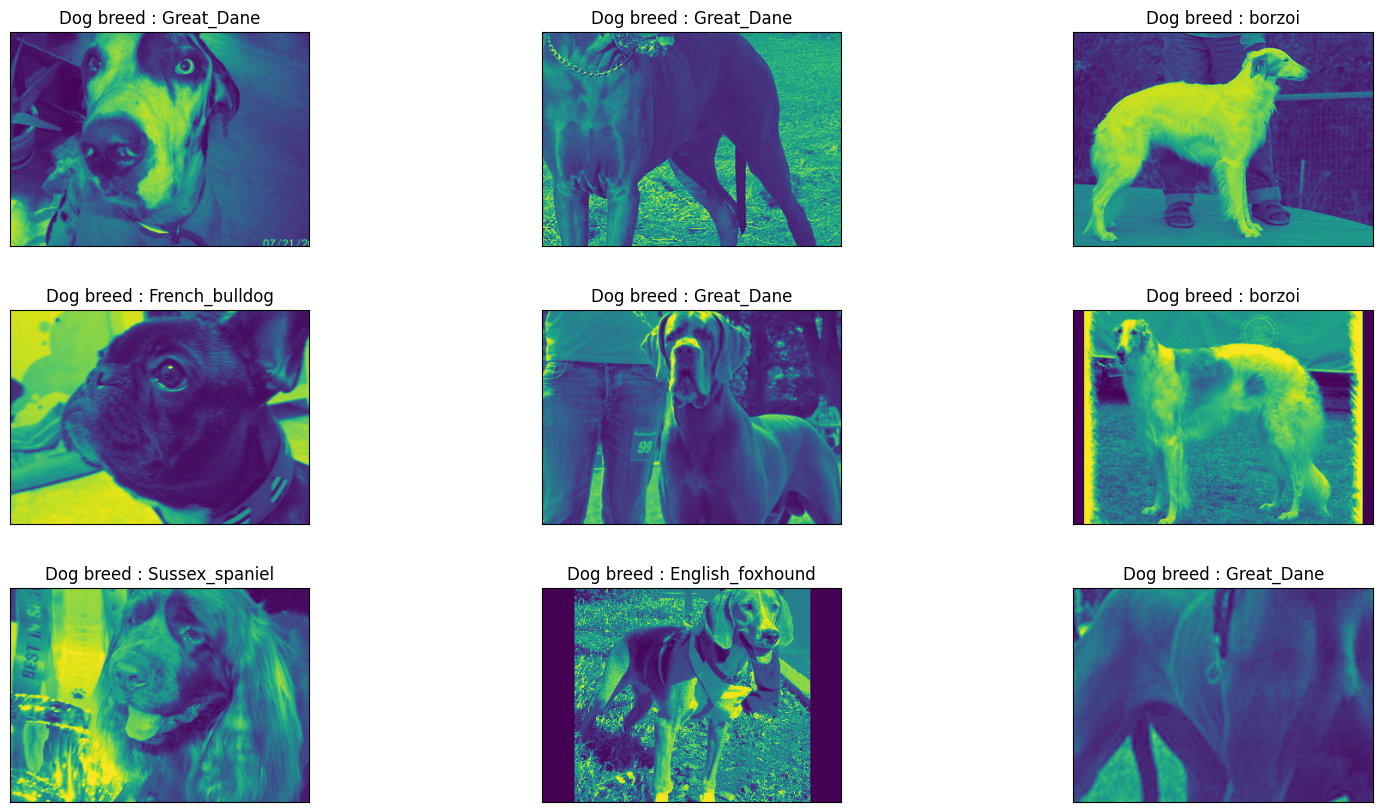

No. of images loaded =  1548 
No. of labels loaded =  1548


In [8]:
images = []
labels = []


for index, row in data.iterrows():
    image_path = row['Photo_Path']
    label = row['Dogs_Type']

    processed_image = preprocess_image(image_path)

    augmented_image = augment_image(image_path)

    images.append(processed_image)
    labels.append(label)
    images.append(augmented_image)
    labels.append(label)

images = np.array(images)
labels = np.array(labels)
print(images)
print(labels)

display_rand_images(images, labels)
print("No. of images loaded = ",len(images),"\nNo. of labels loaded = ",len(labels))


In [9]:
print("Images shape = ",images.shape,"\nLabels shape = ",labels.shape)

Images shape =  (1548, 250, 350) 
Labels shape =  (1548,)


In [10]:

number_of_images, height, width = images.shape
images_flattened = images.reshape(number_of_images, height * width )  # Shape: (n, 250*350)


label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(labels)

# Split data into training, testing, and validation sets
x_train, x_test, y_train, y_test = train_test_split(images_flattened, y_encoded, stratify=y_encoded, test_size=0.3, random_state=42)

print("x_train shape = ", x_train.shape)
print("y_train shape = ", y_train.shape)
print("\nx_test shape = ", x_test.shape)
print("y_test shape = ", y_test.shape)


x_train shape =  (1083, 87500)
y_train shape =  (1083,)

x_test shape =  (465, 87500)
y_test shape =  (465,)


KNN Accuracy: 0.82

Classification Report (KNN):
              precision    recall  f1-score   support

           0       0.90      0.91      0.91        94
           1       0.88      0.79      0.83        95
           2       0.70      0.85      0.77        94
           3       0.79      0.85      0.82        91
           4       0.86      0.69      0.77        91

    accuracy                           0.82       465
   macro avg       0.83      0.82      0.82       465
weighted avg       0.83      0.82      0.82       465


Precision: 82.75%
Recall: 81.94%
F1 Score: 81.94%


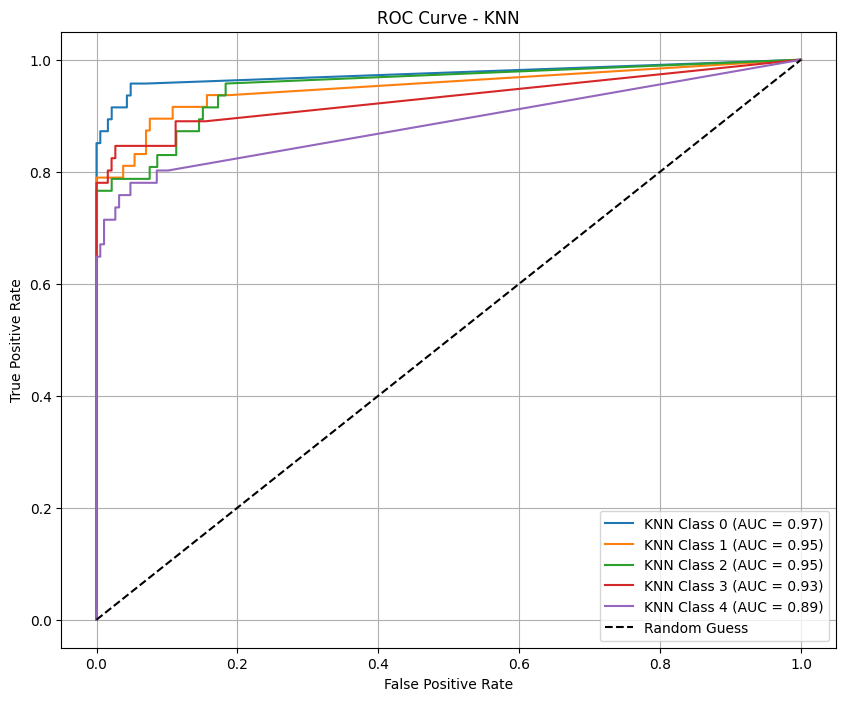

In [ ]:
# param_grid = {
#     'n_neighbors': [3, 5, 7, 9, 11],  # Different values of k
#     'weights': ['uniform', 'distance'],  # Weighting methods
#     'metric': ['euclidean', 'manhattan', 'minkowski']  # Distance metrics
# }

# knn = KNeighborsClassifier()


# grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1)
# grid_search.fit(x_train, y_train)

# print(f"Best Parameters: {grid_search.best_params_}")
# print(f"Best Cross-Validation Accuracy: {grid_search.best_score_:.2f}")


# KNN Implementation
k = 7 
knn = KNeighborsClassifier(n_neighbors=k, weights='distance', metric='manhattan')
knn.fit(x_train, y_train)

y_pred_knn = knn.predict(x_test)
y_prob_knn = knn.predict_proba(x_test)

accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"KNN Accuracy: {accuracy_knn:.2f}")

print("\nClassification Report (KNN):")
print(classification_report(y_test, y_pred_knn)) 

precision_knn = precision_score(y_test, y_pred_knn, average='weighted')
recall_knn = recall_score(y_test, y_pred_knn, average='weighted')
f1_knn = f1_score(y_test, y_pred_knn, average='weighted')

print(f"\nPrecision: {precision_knn * 100:.2f}%")
print(f"Recall: {recall_knn * 100:.2f}%")
print(f"F1 Score: {f1_knn * 100:.2f}%")

classes = len(set(y_test))  
plt.figure(figsize=(10, 8))
for i in range(classes):
    knn_fpr, knn_tpr, _ = roc_curve((y_test == i).astype(int), y_prob_knn[:, i])
    knn_auc = roc_auc_score((y_test == i).astype(int), y_prob_knn[:, i])
    plt.plot(knn_fpr, knn_tpr, label=f'KNN Class {i} (AUC = {knn_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - KNN')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


[[86  2  4  2  0]
 [ 2 75  8  6  4]
 [ 0  2 80  6  6]
 [ 2  4  8 77  0]
 [ 6  2 14  6 63]]


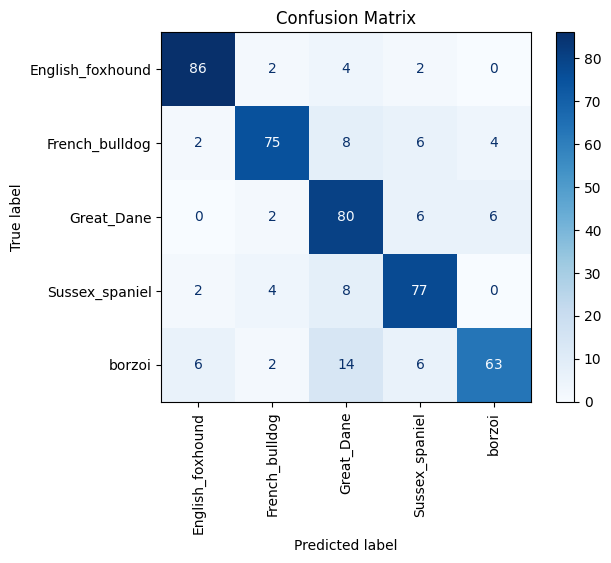

In [12]:
cm = confusion_matrix(y_test, y_pred_knn)
print(cm)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
disp.plot(cmap=plt.cm.Blues, xticks_rotation='vertical')
plt.title("Confusion Matrix")
plt.show()

In [13]:
number_of_images, height, width = images.shape
images_flattened = images.reshape(number_of_images, height * width  )  # Shape: (n, 350*350)
x_train, x_test, y_train, y_test = train_test_split(images_flattened, y_encoded,stratify=y_encoded ,test_size=0.3, random_state=42)


logreg = LogisticRegression(max_iter=1000, multi_class='ovr', solver='lbfgs')
logreg.fit(x_train, y_train)


y_pred_logreg = logreg.predict(x_test)
y_prob_logreg = logreg.predict_proba(x_test)

accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
print(f"Logistic Regression Accuracy: {accuracy_logreg:.2f}")

print("\nClassification Report (Logistic Regression):")
print(classification_report(y_test, y_pred_logreg))

precision_logreg = precision_score(y_test, y_pred_logreg, average='weighted')
recall_logreg = recall_score(y_test, y_pred_logreg, average='weighted')
f1_logreg = f1_score(y_test, y_pred_logreg, average='weighted')

print(f"\nPrecision: {precision_logreg * 100:.2f}%")
print(f"Recall: {recall_logreg * 100:.2f}%")
print(f"F1 Score: {f1_logreg * 100:.2f}%")

classes = len(set(y_test)) 
logreg_auc = roc_auc_score(y_test, y_prob_logreg, multi_class='ovr', average='weighted')
print(f"\nLogistic Regression AUC: {logreg_auc:.2f}")


logreg_loss = log_loss(y_test, y_prob_logreg)

print(f"\nLogistic Regression Log Loss: {logreg_loss:.4f}")

c:\Users\Ziad Ghanem\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


Logistic Regression Accuracy: 0.82

Classification Report (Logistic Regression):
              precision    recall  f1-score   support

           0       0.89      0.87      0.88        94
           1       0.81      0.83      0.82        95
           2       0.78      0.85      0.82        94
           3       0.73      0.82      0.77        91
           4       0.92      0.71      0.80        91

    accuracy                           0.82       465
   macro avg       0.83      0.82      0.82       465
weighted avg       0.83      0.82      0.82       465


Precision: 82.68%
Recall: 81.94%
F1 Score: 81.97%

Logistic Regression AUC: 0.93

Logistic Regression Log Loss: 1.1157


[[82  2  2  6  2]
 [ 0 79 10  4  2]
 [ 0  2 80 12  0]
 [ 2  8  4 75  2]
 [ 8  6  6  6 65]]


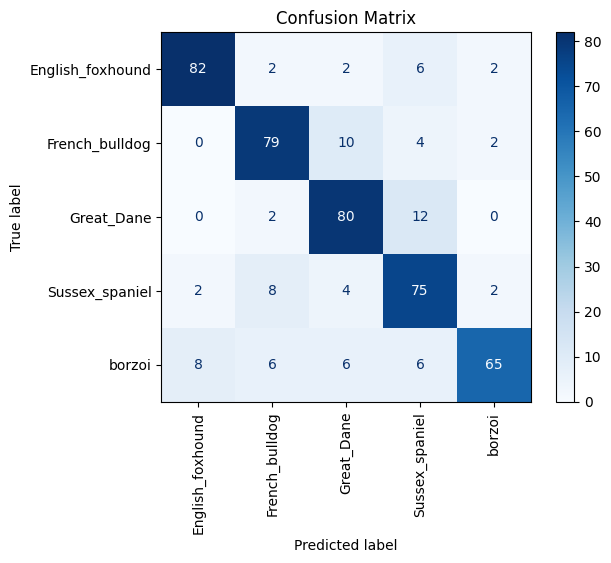

In [14]:
cm = confusion_matrix(y_test, y_pred_logreg)
print(cm)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
disp.plot(cmap=plt.cm.Blues, xticks_rotation='vertical')

plt.title("Confusion Matrix")
plt.show()